In [1]:
from os import link
from typing import BinaryIO
import networkx as nx
from networkx.algorithms.shortest_paths.unweighted import predecessor
from networkx.drawing.nx_agraph import graphviz_layout
from matplotlib import pyplot as plt
import random
import numpy as np
import time
import sys


class SinglyLinkedListNode:
    """A node with a value and a reference to the next node."""
    def __init__(self, data):
        self.value, self.next = data, None

class SinglyLinkedList:
    """A singly linked list with a head and a tail."""
    def __init__(self):
        self.head, self.tail = None, None

    def append(self, data):
        """Add a node containing the data to the end of the list."""
        n = SinglyLinkedListNode(data)
        if self.head is None:
            self.head, self.tail = n, n
        else:
            self.tail.next = n
            self.tail = n

    def iterative_find(self, data):
        """Search iteratively for a node containing the data.
        If there is no such node in the list, including if the list is empty,
        raise a ValueError.

        Returns:
            (SinglyLinkedListNode): the node containing the data.
        """
        current = self.head
        while current is not None:
            if current.value == data:
                return current
            current = current.next
        raise ValueError(str(data) + " is not in the list")

    # Problem 1
    def recursive_find(self, data):
        """Search recursively for the node containing the data.
        If there is no such node in the list, including if the list is empty,
        raise a ValueError.

        Returns:
            (SinglyLinkedListNode): the node containing the data.
        """

        def _traverse_list(current):
            """Searches for the node containg the data. Raises a value error if there is no such node in
            in the list

            Returns:
                (SinglyLinkedListNode): the node containing the data.

            """
            if current is None:            #we raise a value error if we have gone through our whole list and the node wasn't there
                raise ValueError(str(data) + " is not in the list")
            if current.value == data:          #if the value of the current node equals what we are searching for, then we return it. 
                return current
            else:
                return _traverse_list(current.next)

        return _traverse_list(self.head)   #we start by calling the functinon on our head node

In [2]:
class BSTNode:
    """A node class for binary search trees. Contains a value, a
    reference to the parent node, and references to two child nodes.
    """
    def __init__(self, data):
        """Construct a new node and set the value attribute. The other
        attributes will be set when the node is added to a tree.
        """
        self.value = data
        self.prev = None        # A reference to this node's parent node.
        self.left = None        # self.left.value < self.value
        self.right = None       # self.value < self.right.value

In [3]:
class BST:
    """Binary search tree data structure class.
    The root attribute references the first node in the tree.
    """
    def __init__(self):
        """Initialize the root attribute."""
        self.root = None

    def find(self, data):
        """Return the node containing the data. If there is no such node
        in the tree, including if the tree is empty, raise a ValueError.
        """

        # Define a recursive function to traverse the tree.
        def _step(current):
            """Recursively step through the tree until the node containing
            the data is found. If there is no such node, raise a Value Error.
            """
            if current is None:                     # Base case 1: dead end.
                raise ValueError(str(data) + " is not in the tree.")
            if data == current.value:               # Base case 2: data found!
                return current
            if data < current.value:                # Recursively search left.
                return _step(current.left)
            else:                                   # Recursively search right.
                return _step(current.right)

        # Start the recursion on the root of the tree.
        return _step(self.root)

    # Problem 2
    def insert(self, data):
        """Insert a new node containing the specified data.

        Raises:
            ValueError: if the data is already in the tree.

        Example:
            >>> tree = BST()                    |
            >>> for i in [4, 3, 6, 5, 7, 8, 1]: |            (4)
            ...     tree.insert(i)              |            / \
            ...                                 |          (3) (6)
            >>> print(tree)                     |          /   / \
            [4]                                 |        (1) (5) (7)
            [3, 6]                              |                  \
            [1, 5, 7]                           |                  (8)
            [8]                                 |
        """
        
        if self.root is None:                  #if the tree is empty insert the node as the root
            self.root  = BSTNode(data)

        elif self.root.value == data:
            raise ValueError(str(data) + " is already in the tree")  #checks the special case of the new node being equal to the root

        else:
            new_node = BSTNode(data)

            def _traverse_tree(current, node):
                """Recursively go through the tree until we find the appropriate 
                spot to create a new leaf node with the specified data
                """
                if current.value == node.value:             
                    raise ValueError(str(data) + " is already in the tree")

                elif (current.left != None and current.left.value == node.value) or (current.right != None and current.right.value == node.value):
                    raise ValueError(str(data) + " is already in the tree")          #raise an error if the node already exists

                elif current.right is None and node.value > current.value:    #create new leaf node to the appropriate side of the previous node
                    current.right = node
                    node.prev = current

                elif current.left is None and node.value < current.value:
                    current.left = node
                    node.prev = current

                elif node.value > current.value:
                    return _traverse_tree(current.right, node)
                                                                            #go through the list recursively to either the right or left depending on 
                else:                                                       #if the node is bigger or smaller than the encountered node
                    return _traverse_tree(current.left, node)

            _traverse_tree(self.root, new_node)
        




    # Problem 3
    def remove(self, data):
        """Remove the node containing the specified data.

        Raises:
            ValueError: if there is no node containing the data, including if
                the tree is empty.

        Examples:
            >>> print(12)                       | >>> print(t3)
            [6]                                 | [5]
            [4, 8]                              | [3, 6]
            [1, 5, 7, 10]                       | [1, 4, 7]
            [3, 9]                              | [8]
            >>> for x in [7, 10, 1, 4, 3]:      | >>> for x in [8, 6, 3, 5]:
            ...     t1.remove(x)                | ...     t3.remove(x)
            ...                                 | ...
            >>> print(t1)                       | >>> print(t3)
            [6]                                 | [4]
            [5, 8]                              | [1, 7]
            [9]                                 |
                                                | >>> print(t4)
            >>> print(t2)                       | [5]
            [2]                                 | >>> t4.remove(1)
            [1, 3]                              | ValueError: <message>
            >>> for x in [2, 1, 3]:             | >>> t4.remove(5)
            ...     t2.remove(x)                | >>> print(t4)
            ...                                 | []
            >>> print(t2)                       | >>> t4.remove(5)
            []                                  | ValueError: <message>
        """

        node_to_remove = self.find(data)

        if node_to_remove.right is None and node_to_remove.left is None:    #if node is a leaf node

            if node_to_remove == self.root:
                self.root = None

            else:
                if node_to_remove.value > node_to_remove.prev.value:
                    node_to_remove.prev.right = None
                else:
                    node_to_remove.prev.left = None

        
        elif (node_to_remove.right != None and node_to_remove.left is None):   #if node has right child but no left
            if node_to_remove == self.root:                                    #special case if this node is the root node
                self.root = node_to_remove.right
                self.root.prev = None

            elif node_to_remove.right.value > node_to_remove.prev.value:
                node_to_remove.right.prev = node_to_remove.prev
                node_to_remove.prev.right = node_to_remove.right
            else:                                                              #different cases that depend on if the node that we are putting where the deleted node was has a value
                node_to_remove.right.prev = node_to_remove.prev                #that is larger than the value of the node that will now precede its
                node_to_remove.prev.left = node_to_remove.right

        elif (node_to_remove.right is None and node_to_remove.left != None):    #if node has left child but no right
            if node_to_remove == self.root:                                     #special case if this node is the root node
                self.root = node_to_remove.left
                node_to_remove.left.prev = None
            elif node_to_remove.left.value > node_to_remove.prev.value:         #place the new node at right if its bigger than its previous node
                node_to_remove.left.prev = node_to_remove.prev
                node_to_remove.prev.right = node_to_remove.left

            else:
                node_to_remove.left.prev = node_to_remove.prev                  #place the new node at left if its smaller than its previous node
                node_to_remove.prev.left = node_to_remove.left

        elif node_to_remove.right != None and node_to_remove.left != None:

            def _find_predecessor(node):
                """Recursive method that finds the predecessor of the node to be removed
                by searching right until we find a leaf node
                """
                if node.right is None:
                    return node
                else:
                    return _find_predecessor(node.right)

            predecessor = _find_predecessor(node_to_remove.left)          #we search as far right as possible of the node to the left of the node we remove

            value_of_predecessor = predecessor.value                      #save the value of the predecessor node to reassign to the node we are "deleting"

            if predecessor.value > predecessor.prev.value:

                predecessor.prev.right = None                             #delete the predecessor node based upon which side it is of its previous node

            else:
                predecessor.prev.left = None                              #this case only happens if the predecessor lies to the immediate left of the node to be removed

            node_to_remove.value = value_of_predecessor

    def __str__(self):
        """String representation: a hierarchical view of the BST.

        Example:  (3)
                  / \     '[3]          The nodes of the BST are printed
                (2) (5)    [2, 5]       by depth levels. Edges and empty
                /   / \    [1, 4, 6]'   nodes are not printed.
              (1) (4) (6)
        """
        if self.root is None:                       # Empty tree
            return "[]"
        out, current_level = [], [self.root]        # Nonempty tree
        while current_level:
            next_level, values = [], []
            for node in current_level:
                values.append(node.value)
                for child in [node.left, node.right]:
                    if child is not None:
                        next_level.append(child)
            out.append(values)
            current_level = next_level
        return "\n".join([str(x) for x in out])

    def draw(self):
        """Use NetworkX and Matplotlib to visualize the tree."""
        if self.root is None:
            return

        # Build the directed graph.
        G = nx.DiGraph()
        G.add_node(self.root.value)
        nodes = [self.root]
        while nodes:
            current = nodes.pop(0)
            for child in [current.left, current.right]:
                if child is not None:
                    G.add_edge(current.value, child.value)
                    nodes.append(child)

        # Plot the graph. This requires graphviz_layout (pygraphviz).
        nx.draw(G, pos=graphviz_layout(G, prog="dot"), arrows=True,
                with_labels=True, node_color="C1", font_size=8)
        plt.show()

In [4]:
class AVL(BST):
    """Adelson-Velsky Landis binary search tree data structure class.
    Rebalances after insertion when needed.
    """
    def insert(self, data):
        """Insert a node containing the data into the tree, then rebalance."""
        BST.insert(self, data)      # Insert the data like usual.
        n = self.find(data)
        while n:                    # Rebalance from the bottom up.
            n = self._rebalance(n).prev

    def remove(*args, **kwargs):
        """Disable remove() to keep the tree in balance."""
        raise NotImplementedError("remove() is disabled for this class")

    def _rebalance(self,n):
        """Rebalance the subtree starting at the specified node."""
        balance = AVL._balance_factor(n)
        if balance == -2:                                   # Left heavy
            if AVL._height(n.left.left) > AVL._height(n.left.right):
                n = self._rotate_left_left(n)                   # Left Left
            else:
                n = self._rotate_left_right(n)                  # Left Right
        elif balance == 2:                                  # Right heavy
            if AVL._height(n.right.right) > AVL._height(n.right.left):
                n = self._rotate_right_right(n)                 # Right Right
            else:
                n = self._rotate_right_left(n)                  # Right Left
        return n

    @staticmethod
    def _height(current):
        """Calculate the height of a given node by descending recursively until
        there are no further child nodes. Return the number of children in the
        longest chain down.
                                    node | height
        Example:  (c)                  a | 0
                  / \                  b | 1
                (b) (f)                c | 3
                /   / \                d | 1
              (a) (d) (g)              e | 0
                    \                  f | 2
                    (e)                g | 0
        """
        if current is None:     # Base case: the end of a branch.
            return -1           # Otherwise, descend down both branches.
        return 1 + max(AVL._height(current.right), AVL._height(current.left))

    @staticmethod
    def _balance_factor(n):
        return AVL._height(n.right) - AVL._height(n.left)

    def _rotate_left_left(self, n):
        temp = n.left
        n.left = temp.right
        if temp.right:
            temp.right.prev = n
        temp.right = n
        temp.prev = n.prev
        n.prev = temp
        if temp.prev:
            if temp.prev.value > temp.value:
                temp.prev.left = temp
            else:
                temp.prev.right = temp
        if n is self.root:
            self.root = temp
        return temp

    def _rotate_right_right(self, n):
        temp = n.right
        n.right = temp.left
        if temp.left:
            temp.left.prev = n
        temp.left = n
        temp.prev = n.prev
        n.prev = temp
        if temp.prev:
            if temp.prev.value > temp.value:
                temp.prev.left = temp
            else:
                temp.prev.right = temp
        if n is self.root:
            self.root = temp
        return temp

    def _rotate_left_right(self, n):
        temp1 = n.left
        temp2 = temp1.right
        temp1.right = temp2.left
        if temp2.left:
            temp2.left.prev = temp1
        temp2.prev = n
        temp2.left = temp1
        temp1.prev = temp2
        n.left = temp2
        return self._rotate_left_left(n)

    def _rotate_right_left(self, n):
        temp1 = n.right
        temp2 = temp1.left
        temp1.left = temp2.right
        if temp2.right:
            temp2.right.prev = temp1
        temp2.prev = n
        temp2.right = temp1
        temp1.prev = temp2
        n.right = temp2
        return self._rotate_right_right(n)

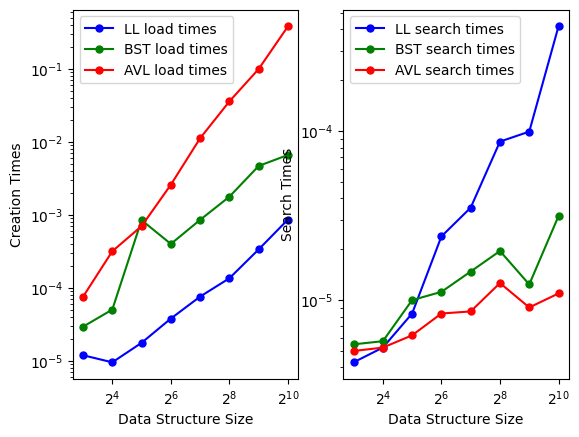

In [5]:
# Problem 4
def prob4():
    """Compare the build and search times of the SinglyLinkedList, BST, and
    AVL classes. For search times, use SinglyLinkedList.iterative_find(),
    BST.find(), and AVL.find() to search for 5 random elements in each
    structure. Plot the number of elements in the structure versus the build
    and search times. Use log scales where appropriate.
    """
    
    myfile = open('english.txt', 'r')
    contents = myfile.readlines()
    myfile.close()

    ll_search_times = []
    BST_search_times = []
    AVL_search_times = []         #initialize empty lists for our search and load times that we will plot

    ll_load_times = []
    BST_load_times = []
    AVL_load_times = []
    

    domain = 2**np.arange(3,11)

    for value in domain:
        singly_linked = SinglyLinkedList()
        binary_tree = BST()
        avl_tree = AVL()

        random_indices = random.sample(range(0, len(contents)), value)      #make a list of n random indices within the number of indices of our list that holds our file contents
        
        list_of_items = []         #initialize empty list of items to which we will add randomly from our file

        for i in range(len(random_indices)):
            list_of_items.append(contents[random_indices[i]])       #make a list of random items from our text file using our random indices


        start1 = time.time()
        for item in list_of_items:                              #time how long it takes to put each random item from the list into
            singly_linked.append(item)                          #the different types of data structures
        ll_load_times.append(time.time() - start1)

        start2 = time.time()
        for item in list_of_items:
            binary_tree.insert(item)
        BST_load_times.append(time.time() - start2)

        start3 = time.time()
        for item in list_of_items:
            avl_tree.insert(item)
        AVL_load_times.append(time.time() - start3)

        random_find_items = []
        random_time_indices = random.sample(range(0, value), 5)         #make a list of five random items from our list of random items that we will search for

        for index in random_time_indices:
            random_find_items.append(list_of_items[index])

        start5 = time.time()
        for item in random_find_items:
            binary_tree.find(item)
        BST_search_times.append(time.time() - start5)

        start4 = time.time()
        for item in random_find_items:
            singly_linked.iterative_find(item)                   #time how long it takes to find all of the items for each data structure
        ll_search_times.append(time.time() - start4)

        start6 = time.time()
        for item in random_find_items:
            avl_tree.find(item)
        AVL_search_times.append(time.time() - start6)

    ax1 = plt.subplot(121)
    ax1.loglog(domain, ll_load_times, 'b.-', linewidth=1.5, markersize=10, label="LL load times")
    ax1.loglog(domain, BST_load_times, 'g.-', linewidth=1.5, markersize=10, label="BST load times")    #plot the load times on a log scale due to the temp complexities
    ax1.loglog(domain, AVL_load_times, 'r.-', linewidth=1.5, markersize=10, label="AVL load times")
    ax1.set_xscale('log', base=2)
    plt.legend(loc="upper left")
    plt.xlabel("Data Structure Size")
    plt.ylabel("Creation Times")

    ax2 = plt.subplot(122)
    ax2.loglog(domain, ll_search_times, 'b.-', linewidth=1.5, markersize=10, label="LL search times")
    ax2.loglog(domain, BST_search_times, 'g.-', linewidth=1.5, markersize=10, label="BST search times")      #plot the search times on a log scale to showcase the temp complexities
    ax2.loglog(domain, AVL_search_times, 'r.-', linewidth=1.5, markersize=10, label="AVL search times")
    ax2.set_xscale('log', base=2)
    plt.legend(loc="upper left")
    plt.xlabel("Data Structure Size")
    plt.ylabel("Search Times")

    plt.show()
prob4()